<a href="https://colab.research.google.com/github/bachvu98/Data-Mining/blob/main/Data_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Epitopes Classification

## Problem Statement

The goal of this report is to present a fully developed data mining solution whilst showing the whole process of its development. All observations in our data are related to linear B-Cell epitopes, which are protein regions of interest for a variety of applications in immunology. The goal is to develop a
classification model to predict the class of new, previously unseen observations with the
best possible classification performance.

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.decomposition import PCA
from sklearn.decomposition import SparsePCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score, cross_validate
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, recall_score, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, auc, matthews_corrcoef, make_scorer
import keras
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.wrappers.scikit_learn import KerasClassifier

## Get Data

Read in the file. This dataset contains 4907 rows and 451 columns. Out of which one is dependent variable and rest 450 are independent variables — physico-chemical characteristics.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/bachvu98/Data-Mining/main/CW_data.csv')
df

,Info_PepID,Info_protein_id,Info_center_pos,Info_AA,Info_window_seq,feat_seq_entropy,feat_C_atoms,feat_H_atoms,feat_N_atoms,feat_O_atoms,feat_S_atoms,feat_molecular_weight,feat_Perc_Tiny,feat_Perc_Small,feat_Perc_Aliphatic,feat_Perc_Aromatic,feat_Perc_NonPolar,feat_Perc_Polar,feat_Perc_Charged,feat_Perc_Basic,feat_Perc_Acidic,feat_PP1,feat_PP2,feat_PP3,feat_KF1,feat_KF2,feat_KF3,feat_KF4,feat_KF5,feat_KF6,feat_KF7,feat_KF8,feat_KF9,feat_KF10,feat_Z1,feat_Z2,feat_Z3,feat_Z4,feat_Z5,feat_F1,...,feat_CT642,feat_CT643,feat_CT644,feat_CT645,feat_CT646,feat_CT650,feat_CT651,feat_CT652,feat_CT653,feat_CT654,feat_CT655,feat_CT656,feat_CT660,feat_CT661,feat_CT662,feat_CT663,feat_CT664,feat_CT665,feat_CT666,feat_Perc_A,feat_Perc_C,feat_Perc_D,feat_Perc_E,feat_Perc_F,feat_Perc_G,feat_Perc_H,feat_Perc_I,feat_Perc_K,feat_Perc_L,feat_Perc_M,feat_Perc_N,feat_Perc_P,feat_Perc_Q,feat_Perc_R,feat_Perc_S,feat_Perc_T,feat_Perc_V,feat_Perc_W,feat_Perc_Y,Class
0,AAA99570.1:2,AAA99570.1,17,D,NQTTVKADSDNNRSA,3.056565,62,133,23,42,0,1872.85,0.400000,0.800000,0.200000,0.0,0.200000,0.800000,0.266667,0.133333,0.133333,0.356000,-0.528667,0.135333,0.151333,-0.395333,0.035333,0.658667,-0.156000,-0.131333,-0.344667,-0.083333,0.096000,-0.332000,1.922667,-0.211333,-0.048667,-0.870667,0.683333,-0.739400,...,0.0,0.0,0.076923,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.133333,0.0,0.133333,0.0,0.0,0.000000,0.0,0.000000,0.066667,0.000000,0.0,0.200000,0.000000,0.066667,0.066667,0.133333,0.133333,0.066667,0.0,0.0,1
1,AAA99570.1:2,AAA99570.1,18,S,QTTVKADSDNNRSAS,3.056565,61,132,22,42,0,1845.82,0.466667,0.800000,0.200000,0.0,0.200000,0.800000,0.266667,0.133333,0.133333,0.328667,-0.545333,0.172000,0.129333,-0.462667,0.054000,0.632667,-0.182000,-0.184667,-0.464667,-0.242000,-0.042000,-0.232000,1.878667,-0.390667,-0.041333,-0.886667,0.620667,-0.705133,...,0.0,0.0,0.076923,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.133333,0.0,0.133333,0.0,0.0,0.000000,0.0,0.000000,0.066667,0.000000,0.0,0.133333,0.000000,0.066667,0.066667,0.200000,0.133333,0.066667,0.0,0.0,1
2,AAA99570.1:2,AAA99570.1,19,D,TTVKADSDNNRSASV,2.923231,61,133,21,41,0,1816.82,0.466667,0.866667,0.266667,0.0,0.266667,0.733333,0.266667,0.133333,0.133333,0.210000,-0.554000,0.188000,0.111333,-0.526000,0.185333,0.532667,-0.222000,-0.278000,-0.592000,-0.190667,-0.070667,-0.033333,1.589333,-0.600000,-0.048000,-0.854000,0.575333,-0.735267,...,0.0,0.0,0.076923,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.133333,0.0,0.133333,0.0,0.0,0.000000,0.0,0.000000,0.066667,0.000000,0.0,0.133333,0.000000,0.000000,0.066667,0.200000,0.133333,0.133333,0.0,0.0,1
3,AAA99570.1:2,AAA99570.1,20,N,TVKADSDNNRSASVK,2.923231,63,138,22,40,0,1843.89,0.400000,0.800000,0.266667,0.0,0.266667,0.733333,0.333333,0.200000,0.133333,0.223333,-0.504667,0.230000,0.071333,-0.424667,0.089333,0.604000,-0.112667,-0.400000,-0.531333,-0.119333,-0.065333,-0.006000,1.692000,-0.395333,-0.139333,-0.657333,0.622667,-0.825600,...,0.0,0.0,0.076923,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.133333,0.0,0.133333,0.0,0.0,0.000000,0.0,0.000000,0.133333,0.000000,0.0,0.133333,0.000000,0.000000,0.066667,0.200000,0.066667,0.133333,0.0,0.0,1
4,AAA99570.1:2,AAA99570.1,21,N,VKADSDNNRSASVKK,2.739572,65,143,23,39,0,1870.96,0.333333,0.733333,0.266667,0.0,0.266667,0.733333,0.400000,0.266667,0.133333,0.236667,-0.455333,0.272000,0.031333,-0.323333,-0.006667,0.675333,-0.003333,-0.522000,-0.470667,-0.048000,-0.060000,0.021333,1.794667,-0.190667,-0.230667,-0.460667,0.670000,-0.915933,...,0.0,0.0,0.076923,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.133333,0.0,0.133333,0.0,0.0,0.000000,0.0,0.000000,0.200000,0.000000,0.0,0.133333,0.000000,0.000000,0.066667,0.200000,0.000000,0.133333,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

Dataset has only float, integer and object values. No variable column has null/missing values.

# Exploratory Data Analysis

Describe the summary statistics for the features

In [3]:
df.describe()

,Info_center_pos,feat_seq_entropy,feat_C_atoms,feat_H_atoms,feat_N_atoms,feat_O_atoms,feat_S_atoms,feat_molecular_weight,feat_Perc_Tiny,feat_Perc_Small,feat_Perc_Aliphatic,feat_Perc_Aromatic,feat_Perc_NonPolar,feat_Perc_Polar,feat_Perc_Charged,feat_Perc_Basic,feat_Perc_Acidic,feat_PP1,feat_PP2,feat_PP3,feat_KF1,feat_KF2,feat_KF3,feat_KF4,feat_KF5,feat_KF6,feat_KF7,feat_KF8,feat_KF9,feat_KF10,feat_Z1,feat_Z2,feat_Z3,feat_Z4,feat_Z5,feat_F1,feat_F2,feat_F3,feat_F4,feat_F5,...,feat_CT642,feat_CT643,feat_CT644,feat_CT645,feat_CT646,feat_CT650,feat_CT651,feat_CT652,feat_CT653,feat_CT654,feat_CT655,feat_CT656,feat_CT660,feat_CT661,feat_CT662,feat_CT663,feat_CT664,feat_CT665,feat_CT666,feat_Perc_A,feat_Perc_C,feat_Perc_D,feat_Perc_E,feat_Perc_F,feat_Perc_G,feat_Perc_H,feat_Perc_I,feat_Perc_K,feat_Perc_L,feat_Perc_M,feat_Perc_N,feat_Perc_P,feat_Perc_Q,feat_Perc_R,feat_Perc_S,feat_Perc_T,feat_Perc_V,feat_Perc_W,feat_Perc_Y,Class
count,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,...,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.0,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.0,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000
mean,237.800285,2.967125,71.138170,145.627063,20.143061,38.892399,0.144080,1910.216108,0.309014,0.527763,0.291108,0.058420,0.431397,0.568603,0.316555,0.157041,0.159514,0.031674,-0.385500,0.045714,-0.166198,-0.265832,-0.147853,0.316094,-0.094627,-0.419413,-0.039130,-0.111248,-0.048050,-0.026923,0.666622,-0.491523,-0.331989,-0.620221,0.437229,-0.424951,0.095081,-0.231626,0.470484,0.117844,...,0.003574,0.003292,0.004875,0.004844,0.003809,0.007101,0.0,0.006020,0.002022,0.003464,0.003684,0.004060,0.003182,0.0,0.004233,0.003041,0.002978,0.005800,0.002728,0.108702,0.001223,0.067251,0.092263,0.016181,0.044671,0.016752,0.035147,0.106433,0.089600,0.008383,0.049494,0.044345,0.048135,0.033856,0.088364,0.066055,0.057659,0.003736,0.021751,-0.393112
std,261.151590,0.288593,6.766207,11.067443,2.832085,3.027500,0.401062,124.781144,0.145743,0.173096,0.126031,0.072698,0.147883,0.147883,0.164906,0.097903,0.109097,0.247882,0.122471,0.154564,0.346892,0.288143,0.288041,0.280712,0.250174,0.209948,0.293780,0.325023,0.195777,0.248213,0.726510,0.524818,0.406264,0.355932,0.229052,0.266743,0.351862,0.222181,0.214176,0.288024,...,0.016488,0.016692,0.019439,0.019508,0.017329,0.022805,0.0,0.021237,0.012308,0.016909,0.017146,0.017956,0.015709,0.0,0.018739,0.015388,0.015939,0.021468,0.014971,0.089586,0.008946,0.065131,0.094811,0.034078,0.059568,0.035628,0.049063,0.081071,0.073266,0.025351,0.060004,0.068443,0.055030,0.053778,0.084013,0.069178,0.063231,0.016419,0.043248,0.919584
min,1.000000,1.705587,47.000000,110.000000,15.000000,30.000000,0.000000,1499.560000,0.000000,0.066667,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,-0.760000,-0.716667,-0.442667,-1.268000,-1.206667,-0.924000,-0.749333,-0.829333,-1.188000,-1.042000,-1.196667,-0.816000,-1.010667,-2.766667,-2.494000,-1.775333,-1.593333,-0.533333,-1.267333,-1.011867,-1.034667,-0.221067,-0.548200,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

Number of unique attributes

In [4]:
df.nunique(axis=0)

Info_PepID          194
Info_protein_id     103
Info_center_pos     908
Info_AA              20
Info_window_seq    4013
                   ... 
feat_Perc_T           7
feat_Perc_V           7
feat_Perc_W           3
feat_Perc_Y           5
Class                 2
Length: 451, dtype: int64

Check for missing data

In [5]:
df.isnull().sum()

Info_PepID         0
Info_protein_id    0
Info_center_pos    0
Info_AA            0
Info_window_seq    0
                  ..
feat_Perc_T        0
feat_Perc_V        0
feat_Perc_W        0
feat_Perc_Y        0
Class              0
Length: 451, dtype: int64

In [6]:
X = df.iloc[:,5:450]
y = df.iloc[:,450]

# Data Preprocessing

## Scaling

In [7]:
X_std = StandardScaler().fit_transform(X)
X_std = pd.DataFrame(X_std, index=X.index, columns=X.columns)
X_std

,feat_seq_entropy,feat_C_atoms,feat_H_atoms,feat_N_atoms,feat_O_atoms,feat_S_atoms,feat_molecular_weight,feat_Perc_Tiny,feat_Perc_Small,feat_Perc_Aliphatic,feat_Perc_Aromatic,feat_Perc_NonPolar,feat_Perc_Polar,feat_Perc_Charged,feat_Perc_Basic,feat_Perc_Acidic,feat_PP1,feat_PP2,feat_PP3,feat_KF1,feat_KF2,feat_KF3,feat_KF4,feat_KF5,feat_KF6,feat_KF7,feat_KF8,feat_KF9,feat_KF10,feat_Z1,feat_Z2,feat_Z3,feat_Z4,feat_Z5,feat_F1,feat_F2,feat_F3,feat_F4,feat_F5,feat_F6,...,feat_CT641,feat_CT642,feat_CT643,feat_CT644,feat_CT645,feat_CT646,feat_CT650,feat_CT651,feat_CT652,feat_CT653,feat_CT654,feat_CT655,feat_CT656,feat_CT660,feat_CT661,feat_CT662,feat_CT663,feat_CT664,feat_CT665,feat_CT666,feat_Perc_A,feat_Perc_C,feat_Perc_D,feat_Perc_E,feat_Perc_F,feat_Perc_G,feat_Perc_H,feat_Perc_I,feat_Perc_K,feat_Perc_L,feat_Perc_M,feat_Perc_N,feat_Perc_P,feat_Perc_Q,feat_Perc_R,feat_Perc_S,feat_Perc_T,feat_Perc_V,feat_Perc_W,feat_Perc_Y
0,0.309949,-1.350698,-1.141036,1.008879,1.026563,-0.359282,-0.299484,0.624350,1.572913,-0.722973,-0.803675,-1.564889,1.564889,-0.302554,-0.242178,-0.239996,1.308523,-1.169098,0.579878,0.915453,-0.449480,0.636038,1.220495,-0.245345,1.372285,-1.040124,0.085895,0.735859,-1.229220,1.729051,0.533934,0.697455,-0.703706,1.074558,-1.178970,-0.797212,-1.076594,-1.059131,-0.917300,0.365384,...,0.0,-0.216792,-0.197239,3.706801,-0.248326,-0.219851,-0.31143,0.0,-0.283476,-0.164313,-0.204912,-0.214878,-0.226135,-0.202597,0.0,-0.225893,-0.197652,-0.186884,-0.270212,-0.182215,0.274975,-0.136689,1.014708,-0.973222,-0.474867,-0.749991,-0.470228,-0.716445,-0.490562,-1.223068,-0.330694,2.508518,-0.647978,0.336781,0.610165,0.535324,0.972634,0.142468,-0.227571,-0.502992
1,0.309949,-1.498506,-1.231400,0.655746,1.026563,-0.359282,-0.516125,1.081822,1.572913,-0.722973,-0.803675,-1.564889,1.564889,-0.302554,-0.242178,-0.239996,1.198244,-1.305199,0.817129,0.852027,-0.683184,0.700850,1.127864,-0.349283,1.118228,-1.448634,-0.402325,0.030906,-0.826299,1.668481,0.192194,0.715507,-0.748663,0.800939,-1.050493,-0.779780,-1.271950,-0.754366,-0.784427,0.517195,...,0.0,-0.216792,-0.197239,3.706801,-0.248326,-0.219851,-0.31143,0.0,-0.283476,-0.164313,-0.204912,-0.214878,-0.226135,-0.202597,0.0,-0.225893,-0.197652,-0.186884,-0.270212,-0.182215,0.274975,-0.136689,1.014708,-0.973222,-0.474867,-0.749991,-0.470228,-0.716445,-0.490562,-1.223068,-0.330694,1.397370,-0.647978,0.336781,0.610165,1.328929,0.972634,0.142468,-0.227571,-0.502992
2,-0.152110,-1.498506,-1.141036,0.302613,0.696223,-0.359282,-0.748556,1.081822,1.958095,-0.193950,-0.803675,-1.114037,1.114037,-0.302554,-0.242178,-0.239996,0.719472,-1.375971,0.920656,0.800132,-0.903004,1.156849,0.771590,-0.509187,0.673629,-1.882109,-0.244372,-0.115534,-0.025830,1.270190,-0.206715,0.699096,-0.656875,0.603002,-1.163472,-0.748704,-1.250044,-0.293326,-0.828178,0.696145,...,0.0,-0.216792,-0.197239,3.706801,-0.248326,-0.219851,-0.31143,0.0,-0.283476,-0.164313,-0.204912,-0.214878,-0.226135,-0.202597,0.0,-0.225893,-0.197652,-0.186884,-0.270212,-0.182215,0.274975,-0.136689,1.014708,-0.973222,-0.474867,-0.749991,-0.470228,-0.716445,-0.490562,-1.223068,-0.330694,1.397370,-0.647978,-0.874792,0.610165,1.328929,0.972634,1.196905,-0.227571,-0.502992
3,-0.152110,-1.202889,-0.689214,0.655746,0.365884,-0.359282,-0.531594,0.624350,1.572913,-0.193950,-0.803675,-1.114037,1.114037,0.101758,0.438835,-0.239996,0.773267,-0.973114,1.192415,0.684810,-0.551292,0.823530,1.025732,-0.072115,0.092475,-1.675584,-0.024877,-0.088290,0.084302,1.411519,0.183301,0.474261,-0.104279,0.809671,-1.502161,-0.555048,-0.981467,-0.295817,-0.894383,0.860112,...,0.0,-0.216792,-0.197239,3.706801,-0.248326,-0.219851,-0.31143,0.0,-0.283476,-0.164313,-0.204912,-0.214878,-0.226135,-0.202597,0.0,-0.225893,-0.197652,-0.186884,-0.270212,-0.182215,0.274975,-0.136689,1.014708,-0.973222,-0.474867,-0.749991,-0.470228,-0.716445,0.331846,-1.223068,-0.330694,1.397370,-0.647978,-0.874792,0.610165,1.328929,0.008839,1.196905,-0.227571,-0.502992
4,-0.788571,-0.907273,-0.23

## Treatment of Missing Values

## Treatment of Outliers

# Feature extraction and selection approaches

In [8]:
pca = PCA(n_components=0.99, random_state=0)

In [9]:
pca.fit(X_std)
principalComponents = pca.transform(X_std)
principalDf = pd.DataFrame(data = principalComponents)
principalDf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204
0,-0.517929,-7.212791,0.782063,2.177188,3.075588,5.693814,0.527234,-1.596727,-2.959787,0.110246,0.585247,0.685965,-0.623341,-1.254540,-1.786774,1.894838,1.862695,0.114273,0.515751,0.863435,-0.475900,-2.153035,2.568866,0.933772,1.581914,-0.132303,-0.933705,-0.207782,2.253000,0.875042,1.381155,0.838295,1.224533,1.557420,0.095070,-1.217381,-2.277432,-0.217866,-1.794814,0.215913,...,-1.201743,-0.102912,0.248862,-0.144443,-0.073999,1.451867,0.748893,0.411356,-0.416998,-0.309925,-0.381690,-0.236051,-0.774456,-0.041822,-0.134368,-0.845587,-0.313579,-0.459303,-1.221605,0.441935,0.329147,0.116583,-0.276827,0.329851,0.067533,0.256919,0.200682,-0.147573,-1.173217,0.127106,-0.802107,0.990435,0.319937,-0.689997,-0.234969,0.025413,0.611720,0.461428,-0.748509,0.291719
1,-1.716592,-7.129064,1.374041,2.373714,2.360851,5.353468,-0.941388,-1.337473,-2.547389,-0.151943,0.668973,0.494845,-0.131652,-1.902438,-1.707597,1.783559,1.302411,0.257567,0.955095,0.550600,-0.171415,-1.536315,2.584061,0.992466,2.106091,-0.113030,-0.847433,0.107750,2.301344,1.318601,1.314922,0.580736,1.641517,1.230837,-0.597024,-1.663677,-2.347285,-0.010684,-1.368054,0.288640,...,-0.975795,0.086188,0.345629,-0.075146,0.222237,1.089035,0.834622,0.811545,-0.825684,0.017003,-0.354745,-0.489209,-0.127194,-0.162280,0.015335,-0.951870,-0.365651,-0.098788,-1.161824,-0.013000,0.299766,0.009775,-0.989678,0.146057,0.531179,-0.769163,-0.453075,-0.349685,-1.036658,0.171974,-1.024775,0.623537,0.572584,-0.610781,-0.015811,-0.008826,0.524865,0.111841,-0.246767,0.180982
2,-3.230014,-6.056068,1.491488,1.482711,2.006149,5.042231,-1.849560,-2.126175,-3.411762,-0.467480,0.855345,0.657608,0.148551,-2.355742,-1.245325,2.498343,1.219487,0.521128,0.177275,0.796648,-0.159068,-1.446803,2.533040,0.494726,2.408259,0.112921,-0.968517,0.704509,2.499180,1.511700,1.521707,0.275036,1.128322,0.915516,-0.704627,-1.962136,-2.417837,0.524748,-1.868283,0.783757,...,-1.399911,0.103721,0.382245,0.161098,0.338048,0.621787,1.033081,0.595000,-0.644793,-0.069105,-0.428855,-0.615153,0.210700,-0.163637,-0.477487,-0.785425,-0.292289,-0.597743,-0.930506,-0.247642,0.270583,-0.389086,-0.707557,0.221158,0.919594,-0.745526,-0.602165,-0.293884,-0.576487,0.298388,-0.878672,0.733702,0.269305,0.048683,-0.125921,0.109833,-0.001622,0.205530,0.018365,0.371793
3,-1.235076,-4.631192,2.280601,2.409877,1.853643,4.473048,-1.375321,-2.217120,-4.040747,-0.506112,0.967636,0.711953,-0.315351,-2.470194,-1.308386,2.970633,1.688819,0.644120,0.666201,1.076814,-0.244347,-1.688849,2.808088,0.469428,2.519114,0.203769,-1.031617,0.931562,2.395938,1.284852,1.757723,0.004739,1.389897,1.418259,-1.048624,-2.379693,-2.352713,0.929198,-2.549425,1.103602,...,-1.012505,-0.469757,0.648455,-0.099048,0.418801,0.550990,0.770028,-0.111765,-1.046245,0.358776,0.100814,-0.592350,0.217327,-0.025883,-1.315161,-1.100964,-0.307693,-0.326849,-1.431111,-0.595148,0.736198,-0.626942,-0.937719,0.423141,0.558295,-0.782958,-0.270913,-0.397325,-0.672739,0.225094,-0.630920,0.015455,0.311062,-0.346175,0.368521,-0.065204,0.163881,0.063174,0.169299,0.007271
4,0.685001,-3.204052,3.327720,3.172147,1.416146,3.615925,-0.824375,-2.560105,-3.599366,-0.862474,0.962423,-0.039225,-0.842831,-2.193707,-0.969875,3.105871,1.868733,0.753552,0.620235,1.026068,0.003479,-2.231504,2.950356,0.661198,2.426779,-0.050569,-0.830197,1.137940,2.006631,1.411593,1.391531,-0.205596,1.599960,1.171640,-1.297043,-1.810261,-2.096380,0.951979,-2.087446,0.040796,...,-0.815785,-0.284563,0.721588,0.245179,0.060802,0.727336,0.844309,0.245405,-0.765116,-0.013807,-0.042718,-0.185159,-0.064170,-0.406893,-1.726114,-0.309196,0.084528,-0.341808,-1.332278,-0.993319,0.746966,-0.100369,-0.533105,0.667406,0.659293,-0.381677,-0.728069,-0.801032,-0.830399,0.1717

Applying PCA reduce the number of components to 205, which explain 99% information of the original dataset

In [10]:
print(pca.n_components_)
print(sum(pca.explained_variance_ratio_))

205
0.9902328772020959


# Class Imbalance

The data set is imbalanced; of the total records 3418 (69.66 %) had the class “0” and 1489 records (30.34 %) had the outcome “1” for the class output attribute

In [40]:
y.value_counts()

0    3418
1    1489
Name: Class, dtype: int64

In [41]:
print('\nBalance of positive and negative classes (%):')
y.value_counts(normalize=True) * 100


Balance of positive and negative classes (%):


0    69.655594
1    30.344406
Name: Class, dtype: float64

We apply SMOTE to balanced the dataset. SMOTE (Synthetic Minority Over-Sampling technique) shows good results in various applications. SMOTE adds artificially generated data which has the same character as the distribution of the minority class by over-sample the minority classes of the dataset through generating synthetic examples rather than over-sampling with replacement. Applying SMOTE to preprocess the data might improve the classification performance of the classifiers, however, it also introduces additional computational costs of data preprocessing. Oversampling also may cause classifiers to suffer from overfitting if not applied correctly.

# Model Training and Evaludation

In [82]:
y = y.replace(-1, 0)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(principalDf, y, test_size=0.25, stratify=df['Info_PepID'].values, shuffle=True, random_state=0)

In [85]:
ftwo_scorer = make_scorer(matthews_corrcoef)

## K-Nearest Neighbours

### Baseline Model

Done training in 30.462605237960815 seconds.
Best Parameter:  {'n_neighbors': 7}
Mean Test Score:  0.8801169455730399
Sd Test Score:  0.02216739297897984


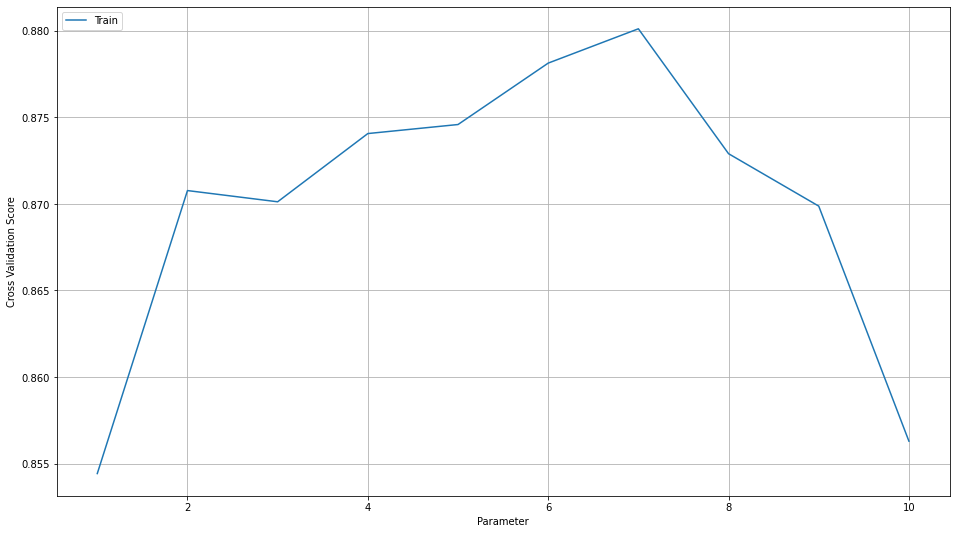

In [94]:
model = KNeighborsClassifier()
start_time = time.time()
kf = StratifiedKFold(n_splits=5)
knnparams = {"n_neighbors": [1,2,3,4,5,6,7,8,9,10]}
clf = GridSearchCV(model, knnparams, scoring=ftwo_scorer, cv = kf, n_jobs=-1).fit(X_train,y_train)
train_time = time.time() - start_time
print('Done training in', train_time, 'seconds.')

results = pd.DataFrame()
# collect parameter list
results['parameter'] = clf.cv_results_['param_n_neighbors'].data
# collect test scores
results['test'] = clf.cv_results_['mean_test_score'].data

plt.rcParams['figure.figsize'] = (16, 9)
plt.plot(results['parameter'], results['test'])
plt.xlabel('Parameter')
plt.ylabel('Cross Validation Score')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()

print('Best Parameter: ', clf.best_params_)
print('Mean Test Score: ', clf.best_score_)
print('Sd Test Score: ', clf.cv_results_['std_test_score'][clf.best_index_])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


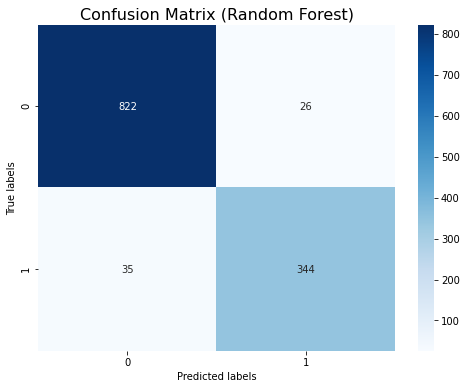

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       848
           1       0.93      0.91      0.92       379

    accuracy                           0.95      1227
   macro avg       0.94      0.94      0.94      1227
weighted avg       0.95      0.95      0.95      1227

MCC Score=0.883


In [95]:
preds = clf.predict(X_test)

# Evaluate
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (Random Forest)', size=16)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues', cbar=True, ax = ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
plt.show()

print(classification_report(y_test.astype(str),preds.astype(str)))

print('MCC Score=%.3f' % matthews_corrcoef(y_test, preds))

### SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Done training in 53.08645558357239 seconds.
Best Parameter:  {'kneighborsclassifier__n_neighbors': 6}
Mean Test Score:  0.8690119035948747
Sd Test Score:  0.02529934879516335


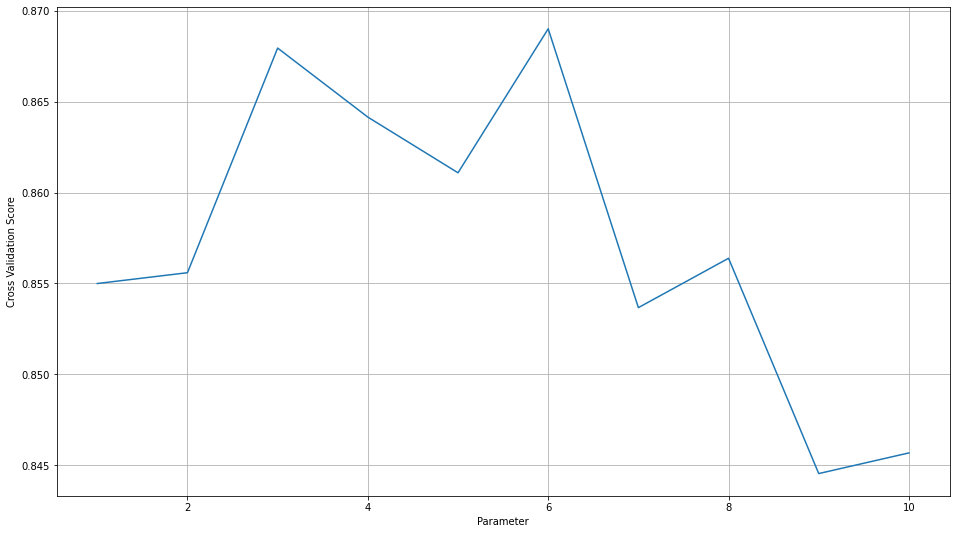

In [100]:
imba_pipeline = make_pipeline(SMOTE(random_state=0), KNeighborsClassifier())
start_time = time.time()
kf = StratifiedKFold(n_splits=5)
params = {"n_neighbors": [1,2,3,4,5,6,7,8,9,10]}
new_params = {'kneighborsclassifier__' + key: params[key] for key in params}
clf = GridSearchCV(imba_pipeline, param_grid=new_params, cv=kf, scoring=ftwo_scorer,n_jobs=-1).fit(X_train, y_train)
train_time = time.time() - start_time
print('Done training in', train_time, 'seconds.')

results = pd.DataFrame()
# collect parameter list
results['parameter'] = clf.cv_results_['param_kneighborsclassifier__n_neighbors'].data
# collect test scores
results['score'] = clf.cv_results_['mean_test_score'].data

plt.rcParams['figure.figsize'] = (16, 9)
plt.plot(results['parameter'], results['score'])
plt.xlabel('Parameter')
plt.ylabel('Cross Validation Score')
plt.grid()

print('Best Parameter: ', clf.best_params_)
print('Mean Test Score: ', clf.best_score_)
print('Sd Test Score: ', clf.cv_results_['std_test_score'][clf.best_index_])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


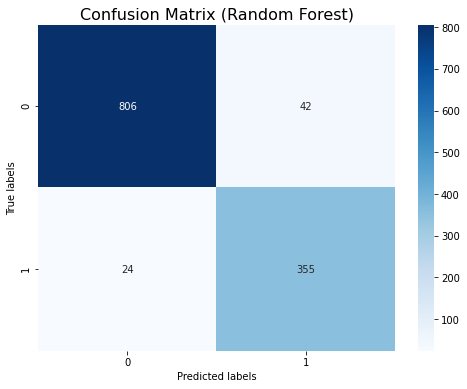

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       848
           1       0.89      0.94      0.91       379

    accuracy                           0.95      1227
   macro avg       0.93      0.94      0.94      1227
weighted avg       0.95      0.95      0.95      1227

MCC Score=0.876


In [101]:
preds = clf.predict(X_test)

# Evaluate
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (Random Forest)', size=16)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues', cbar=True, ax = ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
plt.show()

print(classification_report(y_test.astype(str),preds.astype(str)))

print('MCC Score=%.3f' % matthews_corrcoef(y_test, preds))

## Support Vector Machine

### Baseline Model

Done training in 77.39044737815857 seconds.
{'C': 1.3}
0.8914405194104461
0.018003877186017474


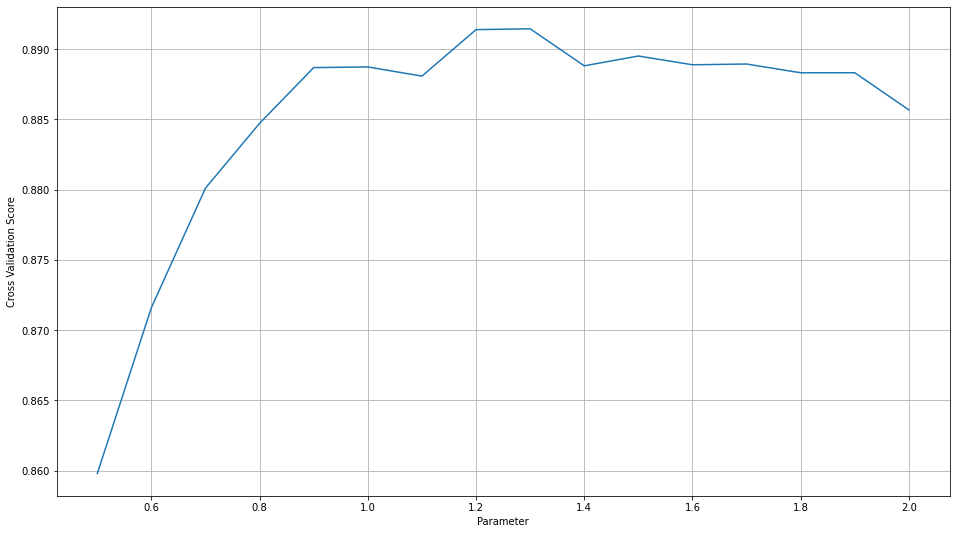

In [104]:
model = SVC(random_state=0)
start_time = time.time()
kf = StratifiedKFold(n_splits=5)
svcparams = {'C': [1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2]} 
clf = GridSearchCV(model, svcparams, scoring=ftwo_scorer, cv = kf, n_jobs=-1).fit(X_train,y_train)
train_time = time.time() - start_time
print('Done training in', train_time, 'seconds.')

results = pd.DataFrame()
# collect parameter list
results['parameter'] = clf.cv_results_['param_C'].data
# collect test scores
results['score'] = clf.cv_results_['mean_test_score'].data

plt.rcParams['figure.figsize'] = (16, 9)
plt.plot(results['parameter'], results['score'])
plt.xlabel('Parameter')
plt.ylabel('Cross Validation Score')
plt.grid()

print(clf.best_params_)
print(clf.best_score_)
print(clf.cv_results_['std_test_score'][clf.best_index_])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


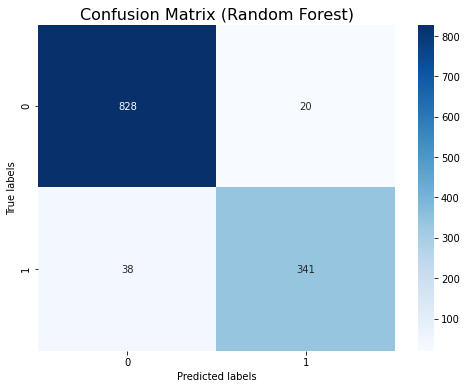

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       848
           1       0.94      0.90      0.92       379

    accuracy                           0.95      1227
   macro avg       0.95      0.94      0.94      1227
weighted avg       0.95      0.95      0.95      1227

MCC Score=0.888


In [98]:
preds = clf.predict(X_test)
#preds_proba = clf.predict_proba(X_test)
#preds_proba = preds_proba[:, 1]

# Evaluate
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (Random Forest)', size=16)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues', cbar=True, ax = ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
plt.show()

print(classification_report(y_test.astype(str),preds.astype(str)))

print('MCC Score=%.3f' % matthews_corrcoef(y_test, preds))

### Cost Sensitive

Done training in 55.93341612815857 seconds.
{'C': 1.4}
0.8770739952071219
0.02029942698674808


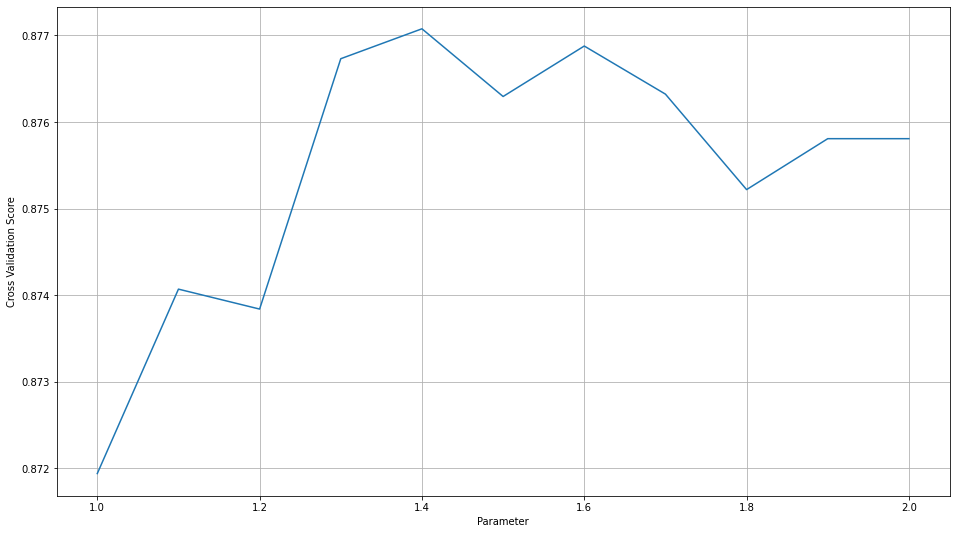

In [102]:
model = SVC(random_state=0, class_weight = 'balanced')
start_time = time.time()
kf = StratifiedKFold(n_splits=5)
svcparams = {'C': [1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2]} 
clf = GridSearchCV(model, svcparams, scoring=ftwo_scorer, cv = kf, n_jobs=-1).fit(X_train,y_train)
train_time = time.time() - start_time
print('Done training in', train_time, 'seconds.')

results = pd.DataFrame()
# collect parameter list
results['parameter'] = clf.cv_results_['param_C'].data
# collect test scores
results['score'] = clf.cv_results_['mean_test_score'].data

plt.rcParams['figure.figsize'] = (16, 9)
plt.plot(results['parameter'], results['score'])
plt.xlabel('Parameter')
plt.ylabel('Cross Validation Score')
plt.grid()

print(clf.best_params_)
print(clf.best_score_)
print(clf.cv_results_['std_test_score'][clf.best_index_])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


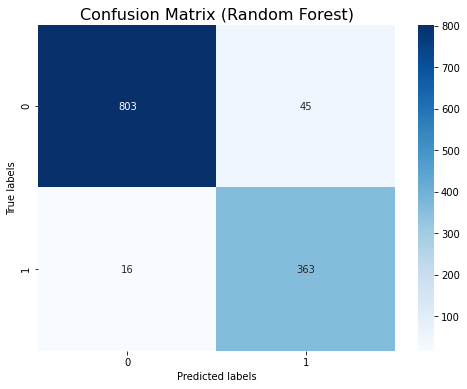

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       848
           1       0.89      0.96      0.92       379

    accuracy                           0.95      1227
   macro avg       0.94      0.95      0.94      1227
weighted avg       0.95      0.95      0.95      1227

MCC Score=0.887


In [103]:
preds = clf.predict(X_test)

# Evaluate
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (Random Forest)', size=16)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues', cbar=True, ax = ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
plt.show()

print(classification_report(y_test.astype(str),preds.astype(str)))

print('MCC Score=%.3f' % matthews_corrcoef(y_test, preds))

### SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Done training in 94.24304056167603 seconds.
{'svc__C': 1.3}
0.8771214527477256
0.016357507610953555


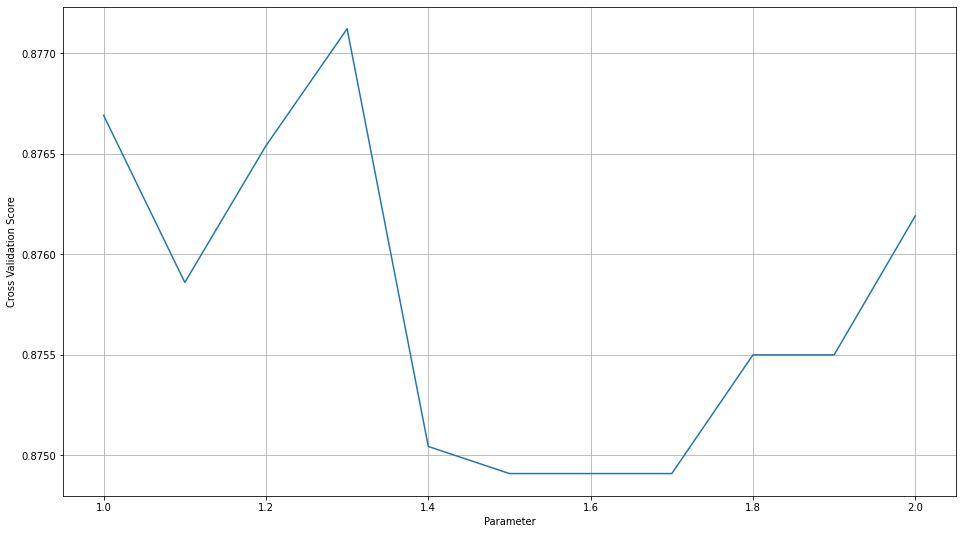

In [108]:
imba_pipeline = make_pipeline(SMOTE(random_state=0), SVC(random_state = 0))
start_time = time.time()
kf = StratifiedKFold(n_splits=5)
params = {"C": [1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2]}
new_params = {'svc__' + key: params[key] for key in params}
clf = GridSearchCV(imba_pipeline, param_grid=new_params, cv=kf, scoring=ftwo_scorer,n_jobs=-1).fit(X_train, y_train)
train_time = time.time() - start_time
print('Done training in', train_time, 'seconds.')

results = pd.DataFrame()
# collect parameter list
results['parameter'] = clf.cv_results_['param_svc__C'].data
# collect test scores
results['score'] = clf.cv_results_['mean_test_score'].data

plt.rcParams['figure.figsize'] = (16, 9)
plt.plot(results['parameter'], results['score'])
plt.xlabel('Parameter')
plt.ylabel('Cross Validation Score')
plt.grid()

print(clf.best_params_)
print(clf.best_score_)
print(clf.cv_results_['std_test_score'][clf.best_index_])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


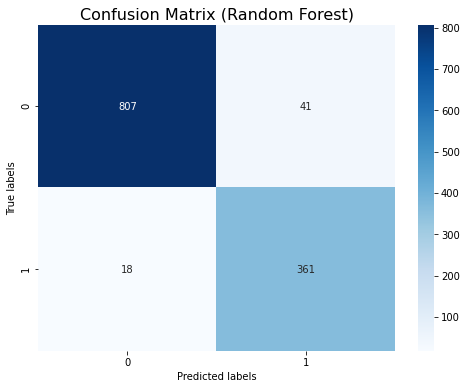

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       848
           1       0.90      0.95      0.92       379

    accuracy                           0.95      1227
   macro avg       0.94      0.95      0.94      1227
weighted avg       0.95      0.95      0.95      1227

MCC Score=0.890


In [109]:
preds = clf.predict(X_test)

# Evaluate
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (Random Forest)', size=16)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues', cbar=True, ax = ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
plt.show()

print(classification_report(y_test.astype(str),preds.astype(str)))

print('MCC Score=%.3f' % matthews_corrcoef(y_test, preds))

## XGBoost

### Baseline Model

Done training in 163.49125003814697 seconds.
{'max_depth': 7}
0.8213245195660264
0.020238248870119793


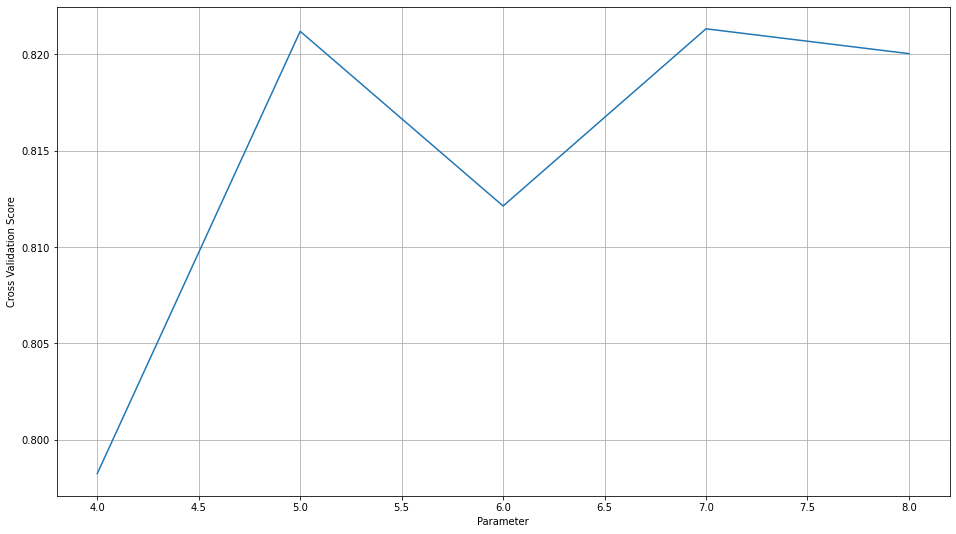

In [113]:
model = xgb.XGBClassifier(random_state=0)
start_time = time.time()
kf = StratifiedKFold(n_splits=5)
xgbparams = {'max_depth': [4,5,6,7,8]}
clf = GridSearchCV(model, xgbparams, scoring=ftwo_scorer, cv = kf, n_jobs=-1).fit(X_train,y_train)
train_time = time.time() - start_time
print('Done training in', train_time, 'seconds.')

results = pd.DataFrame()
# collect parameter list
results['parameter'] = clf.cv_results_['param_max_depth'].data
# collect test scores
results['score'] = clf.cv_results_['mean_test_score'].data

plt.rcParams['figure.figsize'] = (16, 9)
plt.plot(results['parameter'], results['score'])
plt.xlabel('Parameter')
plt.ylabel('Cross Validation Score')
plt.grid()

print(clf.best_params_)
print(clf.best_score_)
print(clf.cv_results_['std_test_score'][clf.best_index_])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


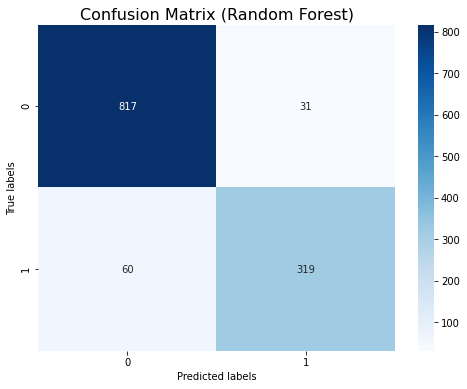

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       848
           1       0.91      0.84      0.88       379

    accuracy                           0.93      1227
   macro avg       0.92      0.90      0.91      1227
weighted avg       0.93      0.93      0.92      1227

MCC Score=0.824


In [114]:
preds = clf.predict(X_test)

# Evaluate
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (Random Forest)', size=16)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues', cbar=True, ax = ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
plt.show()

print(classification_report(y_test.astype(str),preds.astype(str)))

print('MCC Score=%.3f' % matthews_corrcoef(y_test, preds))

In [ ]:
ftwo_scorer = make_scorer(matthews_corrcoef)
model = xgb.XGBClassifier(random_state=0)
start_time = time.time()
kf = StratifiedKFold(n_splits=5)
svcparams = {'C': [0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5]} 
clf = GridSearchCV(model, svcparams, scoring=ftwo_scorer, cv = kf, n_jobs=-1).fit(X_train,y_train)
train_time = time.time() - start_time
print('Done training in', train_time, 'seconds.')

results = pd.DataFrame()
# collect parameter list
results['parameter'] = clf.cv_results_['param_C'].data
# collect test scores
results['score'] = clf.cv_results_['mean_test_score'].data

plt.rcParams['figure.figsize'] = (16, 9)
plt.plot(results['parameter'], results['score'])
plt.xlabel('Parameter')
plt.ylabel('Cross Validation Score')
plt.grid()

print(clf.best_params_)
print(clf.best_score_)
print(clf.cv_results_['std_test_score'][clf.best_index_])

## Neural Network

After the feature engineering this is the next largest amount of work.

I started with a couple of layers (64/31/1) and appropriate model parameters.

The problem is a binary classification which means we use binary_crossentropy as the loss and sigmoid activation on the last layer.
Optimizer is rmsprop (TODO: check other optimizers)

I then iterated over hyperparams to find the best values, tuning each section before moving to the next:

*   Layers
*   Number of epochs
*   Batch size
*   Regularization

Then back through the loop to make sure the later settings hadn't changed the initial tunings.

In [86]:
# Defining the custom metric of Matthew Correlation Coefficient
def mcc(y_true, y_pred):
   y_pred_pos = K.round(K.clip(y_pred, 0, 1))
   y_pred_neg = 1 - y_pred_pos

   y_pos = K.round(K.clip(y_true, 0, 1))
   y_neg = 1 - y_pos

   tp = K.sum(y_pos * y_pred_pos)
   tn = K.sum(y_neg * y_pred_neg)

   fp = K.sum(y_neg * y_pred_pos)
   fn = K.sum(y_pos * y_pred_neg)

   numerator = (tp * tn - fp * fn)
   denominator = K.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))

   return numerator / (denominator + K.epsilon())

In [87]:
def buildmodel():
  #Initialising the neural network
  classifier = Sequential()

  # Adding the input layer and the first hidden layer
  classifier.add(Dense(units = 256, kernel_initializer = 'uniform', activation = 'relu', input_dim = 205))

  # Adding the second hidden layer
  classifier.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu'))

  # Adding the third hidden layer
  classifier.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))

  # Adding the output layer
  classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

  # Compiling the ANN
  classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = [mcc])

  return(classifier)

In [90]:
kf = StratifiedKFold(n_splits=5)
model = KerasClassifier(build_fn = buildmodel, verbose=1, epochs=100)
nnparams = {"batch_size": [50]}
start_time = time.time()
clf = GridSearchCV(model, nnparams, scoring = ftwo_scorer, cv = kf, n_jobs=-1, verbose=1).fit(X_train,y_train)
train_time = time.time() - start_time
print('Done training in', train_time, 'seconds.')

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.8min finished


Epoch 1/100
74/74 [==============================] - 1s 3ms/step - loss: 0.5366 - mcc: 0.2122
Epoch 2/100
74/74 [==============================] - 0s 3ms/step - loss: 0.1388 - mcc: 0.8702
Epoch 3/100
74/74 [==============================] - 0s 3ms/step - loss: 0.0960 - mcc: 0.9000
Epoch 4/100
74/74 [==============================] - 0s 3ms/step - loss: 0.0791 - mcc: 0.9134
Epoch 5/100
74/74 [==============================] - 0s 3ms/step - loss: 0.0691 - mcc: 0.9182
Epoch 6/100
74/74 [==============================] - 0s 3ms/step - loss: 0.0630 - mcc: 0.9211
Epoch 7/100
74/74 [==============================] - 0s 3ms/step - loss: 0.0591 - mcc: 0.9280
Epoch 8/100
74/74 [==============================] - 0s 3ms/step - loss: 0.0684 - mcc: 0.9153
Epoch 9/100
74/74 [==============================] - 0s 3ms/step - loss: 0.0544 - mcc: 0.9315
Epoch 10/100
74/74 [==============================] - 0s 3ms/step - loss: 0.0625 - mcc: 0.9152
Epoch 11/100
74/74 [==============================] - 0s 3m

25/25 [==============================] - 0s 1ms/step


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


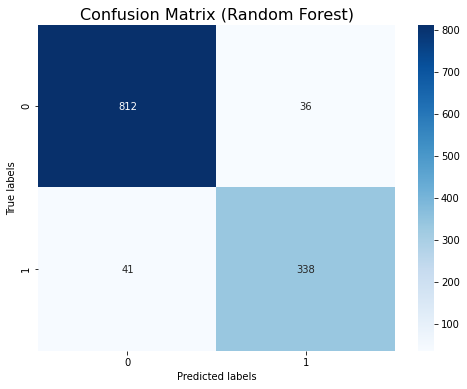

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       848
           1       0.90      0.89      0.90       379

    accuracy                           0.94      1227
   macro avg       0.93      0.92      0.93      1227
weighted avg       0.94      0.94      0.94      1227

MCC Score=0.853


In [93]:
# make class predictions with the model
preds = clf.predict(X_test)

# Evaluate
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (Random Forest)', size=16)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues', cbar=True, ax = ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
plt.show()

print(classification_report(y_test.astype(str),preds.astype(str)))

print('MCC Score=%.3f' % matthews_corrcoef(y_test, preds))

Using matthews correlation coefficient, compares how many we predicted correctly compared to how many predicted incorrectly.
A more useful measure than binary_crossentropy due to the weighted dataset we have.

In [57]:
classifier = buildmodel()
es = EarlyStopping(monitor='loss', mode='min', patience=20, verbose=1)
start_time = time.time()
model = classifier.fit(X_train, y_train, batch_size = 50, epochs = 100, verbose=0, callbacks=[es])
train_time = time.time() - start_time
print('Done training in', train_time, 'seconds.')

Done training in 16.283470630645752 seconds.


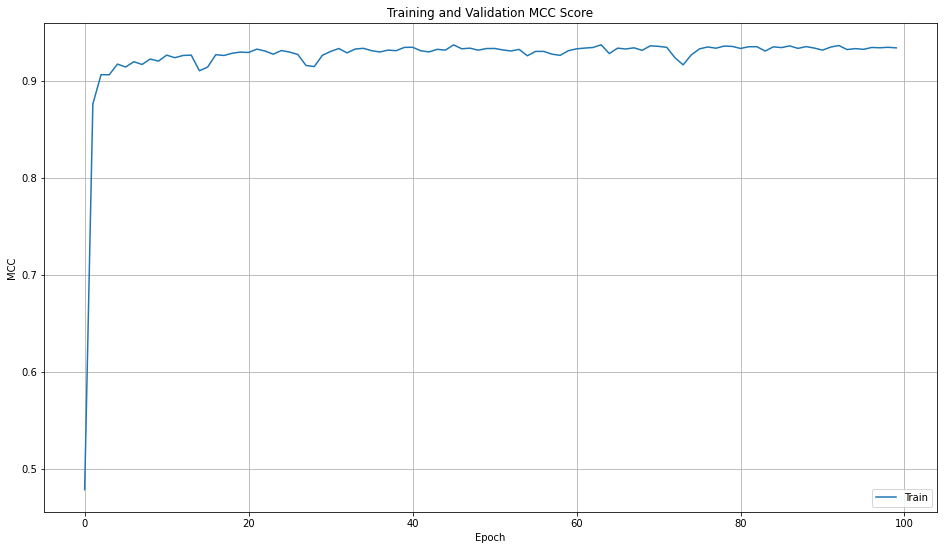

In [58]:
plt.rcParams['figure.figsize'] = (16, 9)
plt.plot(model.history['mcc'])

plt.title('Training and Validation MCC Score')
plt.ylabel('MCC')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

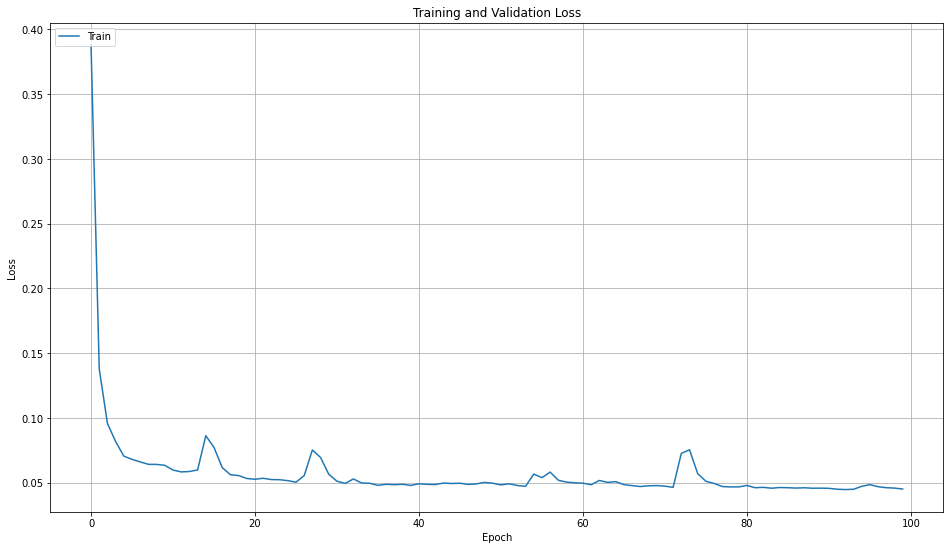

In [59]:
plt.rcParams['figure.figsize'] = (16, 9)
plt.plot(model.history['loss'])

plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


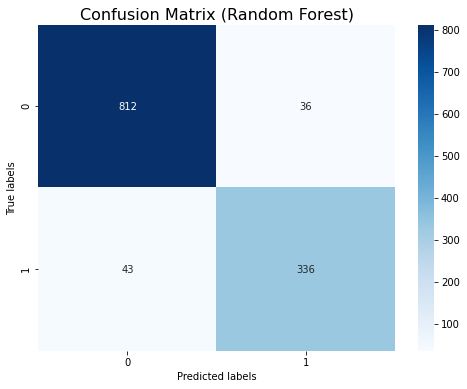

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       848
           1       0.90      0.89      0.89       379

    accuracy                           0.94      1227
   macro avg       0.93      0.92      0.92      1227
weighted avg       0.94      0.94      0.94      1227

MCC Score=0.849


In [60]:
# make class predictions with the model
preds = classifier.predict_classes(X_test)

# Evaluate
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (Random Forest)', size=16)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues', cbar=True, ax = ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
plt.show()

print(classification_report(y_test.astype(str),preds.astype(str)))

print('MCC Score=%.3f' % matthews_corrcoef(y_test, preds))

## Model Selection